In [1]:
import pandas as pd
import matplotlib as mpl

In [2]:
import matplotlib.pyplot as plt

In [3]:
xls = pd.ExcelFile('yelp.xlsx')
df = xls.parse('yelp_data')
df_city = xls.parse('cities')
df_state = xls.parse('states')

df = pd.merge(left = df, right = df_state, how = 'inner', left_on = 'state_id', right_on = 'id')
df = pd.merge(left = df, right = df_city, how = 'inner', left_on = 'city_id', right_on = 'id')
df_pitt = df[df["city"] == "Pittsburgh"]
df_pitt.head()

/Users/sowjanya/.pyenv/versions/3.10.12/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/sowjanya/.pyenv/versions/3.10.12/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/sowjanya/.pyenv/versions/3.10.12/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,id_x,state,id_y,city
95,Aamco Transmissions,Auto Repair,Automotive,False,21,4.5,8,1,1,PA,8,Pittsburgh
96,Animal Rescue League Shelter & Wildlife Center,Animal Shelters,Veterinarians,False,43,4.0,8,1,1,PA,8,Pittsburgh
97,Aracri's Greentree Inn,Italian,American (New),True,15,3.5,8,1,1,PA,8,Pittsburgh
98,Atch-Mont Real Estate,Real Estate Services,Property Management,False,3,2.0,8,1,1,PA,8,Pittsburgh
99,Atria's Restaurant,American (New),Sandwiches,True,69,3.0,8,1,1,PA,8,Pittsburgh


In [4]:
df_vegas = df[df["city"] == "Las Vegas"]

In [5]:
df_vegas.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,id_x,state,id_y,city
430,Reliable Tax Services,Financial Services,Accountants,False,3,4.5,12,2,2,NV,12,Las Vegas
431,Paradise Electro Stimulations,Shopping,Adult,False,4,4.5,12,2,2,NV,12,Las Vegas
432,The Studio,Shopping,Adult,False,7,5.0,12,2,2,NV,12,Las Vegas
433,Boomer's Bar,Bars,American (Traditional),False,19,3.5,12,2,2,NV,12,Las Vegas
434,Omelet House,Breakfast & Brunch,American (Traditional),True,703,4.5,12,2,2,NV,12,Las Vegas


In [6]:
pitt_stars = df_pitt["stars"]

In [7]:
vegas_stars = df_vegas["stars"]

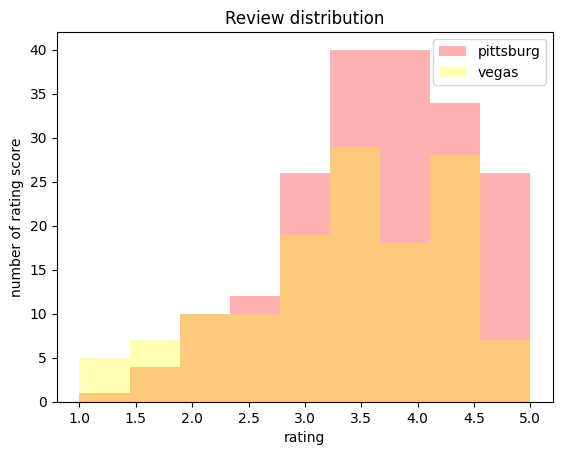

In [8]:
plt.hist(
    pitt_stars,
    alpha = 0.3,
    color = "red",
    label = "pittsburg",
    bins = 'auto'
)

plt.hist(
    vegas_stars,
    alpha = 0.3,
    color = "yellow",
    label = "vegas",
    bins = 'auto'
)

plt.xlabel("rating")
plt.ylabel("number of rating score")
plt.legend(loc = "best")
plt.title("Review distribution")
plt.show()

(array([[ 1.,  4., 10., 12.,  0., 26., 40., 40., 34., 26.],
        [ 5.,  7., 10., 10.,  0., 19., 29., 18., 28.,  7.]]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 2 BarContainer objects>)

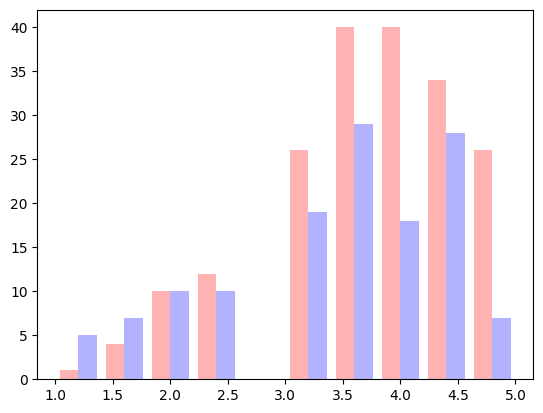

In [9]:
plt.hist(
    [pitt_stars,vegas_stars],
    alpha = 0.3,
    color = ["red","blue"],
    label = ["Pittsburg","Las Vegas"],
    bins = 'auto'
)

In [10]:
df_health = df[df["category_0"] == "Health & Medical"]

In [11]:
df_fast = df[df["category_0"] == "Fast Food"]

In [12]:
df_bb = df[df["category_0"] == "Breakfast & Brunch"]

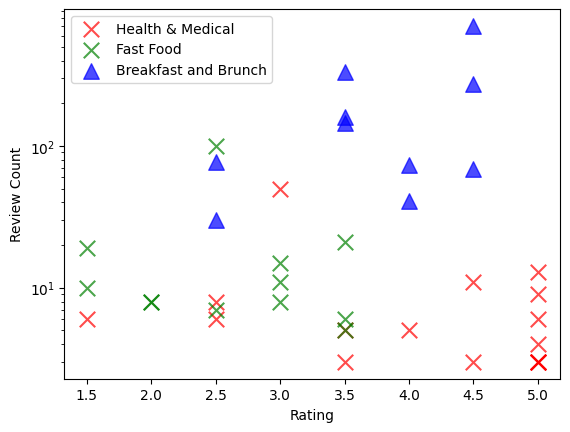

In [20]:
plt.scatter(
    df_health["stars"], df_health["review_count"],
    marker = 'x',
    color = 'r',
    alpha = 0.7,
    label = "Health & Medical",
    s = 124
)

plt.scatter(
    df_fast["stars"], df_fast["review_count"],
    marker = 'x',
    color = 'g',
    alpha = 0.7,
    label = "Fast Food",
    s = 124
)

plt.scatter(
    df_bb["stars"], df_bb["review_count"],
    marker = '^',
    color = 'b',
    alpha = 0.7,
    label = "Breakfast and Brunch",
    s = 124
)

plt.xlabel("Rating")
plt.ylabel("Review Count")
plt.legend(loc = "upper left")
axes = plt.gca()
axes.set_yscale('log')
plt.show()